# Trabalho - Estatística - 2024

Lorran de Araújo Durães Soares

Importando bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Importação de Dados:

In [2]:
data = {}

data['data_q'] = np.loadtxt('./dados/data1q.dat')
data['data_x'] = np.loadtxt('./dados/data1x.dat')
data['data_y'] = np.loadtxt('./dados/data1y.dat')
data['data_t'] = np.loadtxt('./dados/data1t.dat')

print(data)

{'data_q': array([ 2.12712248,  0.25561495,  0.56890579, ..., -1.77891271,
        2.43024496, -0.69265275]), 'data_x': array([-0.68739604,  0.01043891, -0.60682434, ..., -0.26100542,
        0.62026663, -0.53725957]), 'data_y': array([15.81429451,  5.13812896, 25.14639973, ..., 10.5531551 ,
       19.38191103, 32.79544101]), 'data_t': array([7., 5., 8., ..., 7., 8., 7.])}


# Calculando média do conjunto de dados

In [3]:
medias = {}

for key, dat in data.items():
    medias[f'media_{key}'] = np.mean(dat)

print(medias)

{'media_data_q': -8.758442457115927e-05, 'media_data_x': -0.0002313974443142124, 'media_data_y': 20.007564663512877, 'media_data_t': 5.999794}


# Calculando a variância de cada conjunto de dados

In [4]:
variancias = {}

for key, dat in data.items():
    
    med = medias.get(f'media_{key}')
    
    if med is not None: 
        N = len(dat)
        d2 = abs(dat - med)**2
        variancias[f'var_{key}'] = d2.sum() / (N - 1)

print(variancias)

{'var_data_q': 1.9996147450425703, 'var_data_x': 0.33325462888503443, 'var_data_y': 400.36963791585987, 'var_data_t': 3.602209078005816}


# Printando as estimações de cada média e variância 

In [5]:
print("Médias e Variâncias dos bancos de dados")
print("===================================================")
for key,dat in data.items():
    print(f'Variável {key}:')
    print(f'Média da variável {key} = {medias[f"media_{key}"]}')
    print(f'Variância da variável {key} = {variancias[f"var_{key}"]}')
    print("===================================================")

Médias e Variâncias dos bancos de dados
Variável data_q:
Média da variável data_q = -8.758442457115927e-05
Variância da variável data_q = 1.9996147450425703
Variável data_x:
Média da variável data_x = -0.0002313974443142124
Variância da variável data_x = 0.33325462888503443
Variável data_y:
Média da variável data_y = 20.007564663512877
Variância da variável data_y = 400.36963791585987
Variável data_t:
Média da variável data_t = 5.999794
Variância da variável data_t = 3.602209078005816


# Plotando Histogramas normalizados com a pdf de cada conjunto

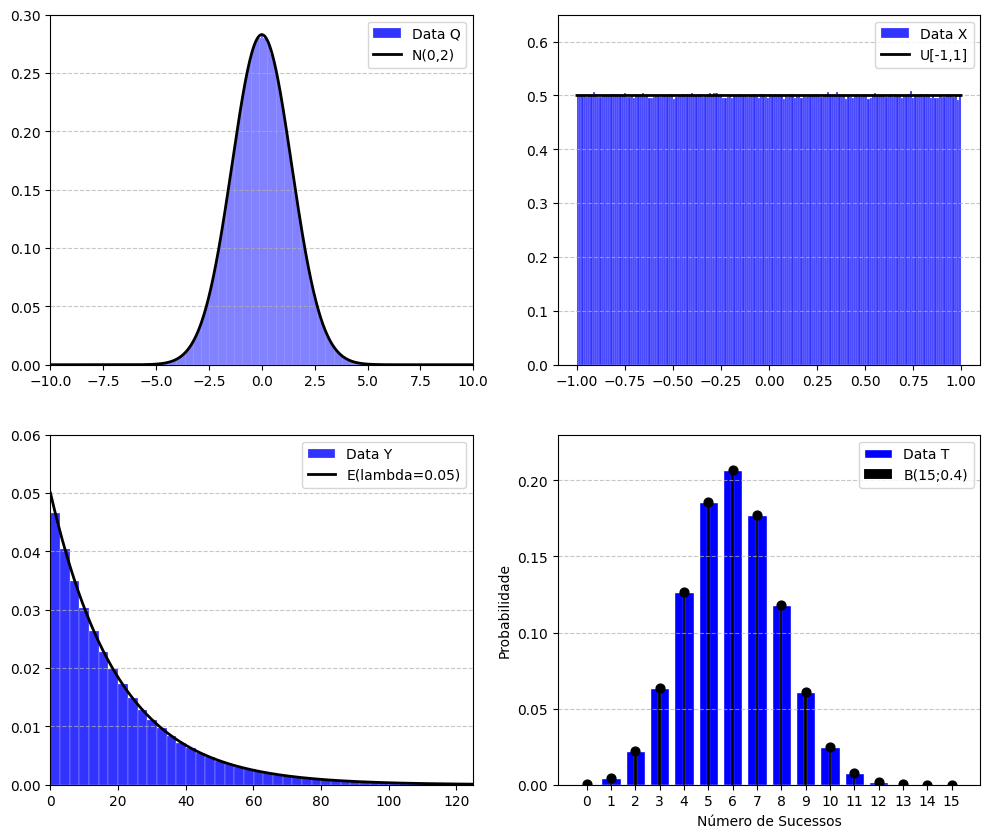

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# data_q
from scipy.stats import norm

x_axis = np.arange(-10, 10, 0.001)
axs[0,0].hist(data['data_q'], density=True, bins='auto', edgecolor="white", alpha=0.8, label='Data Q', linewidth=0.2, color="blue")
axs[0,0].plot(x_axis, norm.pdf(x_axis, 0, 1.41), 'k-', lw=2, label='N(0,2)')
axs[0,0].set_xlim((-10,10))
axs[0,0].set_ylim((0,0.3))
axs[0,0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0,0].legend()

# data_x
from scipy.stats import uniform

x_axis2 = np.arange(-1, 1, 0.001)
axs[0,1].hist(data['data_x'], density=True, bins='auto', edgecolor="white", alpha=0.8, label='Data X', linewidth=0.2, color="blue")
axs[0,1].plot(x_axis2, uniform.pdf(x_axis2, loc=-1,scale=2), 'k-', lw=2, label='U[-1,1]')
axs[0,1].set_xlim((-1.1,1.1))
axs[0,1].set_ylim((0,0.65))
axs[0,1].grid(axis='y', linestyle='--', alpha=0.7)
axs[0,1].legend()

# data_y
from scipy.stats import expon

x_axis3 = np.arange(0, 125, 0.001)
axs[1,0].hist(data['data_y'], density=True, bins=100, edgecolor="white", alpha=0.8, label='Data Y', linewidth=0.2, color="blue")
axs[1,0].plot(x_axis3, expon.pdf(x_axis3, scale=20), 'k-', lw=2, label='E(lambda=0.05)')
axs[1,0].set_xlim((0,125))
axs[1,0].set_ylim((0,0.06))
axs[1,0].grid(axis='y', linestyle='--', alpha=0.7)
axs[1,0].legend()

# data_y
from scipy.stats import binom

n = 15
p = 0.4
x = np.arange(0, n + 1)
probabilidades = binom.pmf(x, n, p)

contagens, bins = np.histogram(data['data_t'], bins=np.arange(-0.5, n + 1.5))
proporcoes = contagens / len(data['data_t'])

axs[1,1].bar(x, proporcoes, color="blue", edgecolor="white", label='Data T')
axs[1,1].bar(x, probabilidades, color='black', edgecolor='white', label = 'B(15;0.4)', width=0.1, linewidth=0.1)
axs[1,1].set_ylim((0,0.23))
axs[1,1].set_xlabel('Número de Sucessos')
axs[1,1].set_ylabel('Probabilidade')
axs[1,1].set_xticks(range(n + 1))  # Definindo o eixo x para cada número de sucessos
axs[1,1].scatter(x, proporcoes, color='black', s=40, zorder=5)
axs[1,1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1,1].legend()

plt.show()

# Calculando média amostral com 10000 amostras de tamanho 5, 10 e 15 

In [7]:
medias_amostrais = {}
medias_amostrais_q = {}
medias_amostrais_x = {}
medias_amostrais_y = {}
medias_amostrais_t = {}

n_samples = [5,10,50]

for key,dat in data.items():
    for n in n_samples:
        medias = []
        amostras = np.random.choice(dat, size=(10000, n), replace=False)
        medias = amostras.mean(axis=1)

        if key == 'data_q':
            medias_amostrais_q[f'{key}_{n}'] = medias
        elif key == 'data_x':
            medias_amostrais_x[f'{key}_{n}'] = medias
        elif key == 'data_y':
            medias_amostrais_y[f'{key}_{n}'] = medias
        elif key == 'data_t':
            medias_amostrais_t[f'{key}_{n}'] = medias
        else:
            raise(ValueError)

medias_amostrais['q'] = medias_amostrais_q
medias_amostrais['x'] = medias_amostrais_x
medias_amostrais['y'] = medias_amostrais_y
medias_amostrais['t'] = medias_amostrais_t

In [8]:
variancias_amostrais = {}
variancias_amostrais_q = {}
variancias_amostrais_x = {}
variancias_amostrais_y = {}
variancias_amostrais_t = {}

n_samples = [5,10,50]

for key,dat in data.items():
    for n in n_samples:
        variancias = []
        amostras = np.random.choice(dat, size=(10000, n), replace=False)
        variancias = amostras.var(axis=1, ddof=1)

        if key == 'data_q':
            variancias_amostrais_q[f'{key}_{n}'] = variancias
        elif key == 'data_x':
            variancias_amostrais_x[f'{key}_{n}'] = variancias
        elif key == 'data_y':
            variancias_amostrais_y[f'{key}_{n}'] = variancias
        elif key == 'data_t':
            variancias_amostrais_t[f'{key}_{n}'] = variancias
        else:
            raise(ValueError)
        

variancias_amostrais['q'] = variancias_amostrais_q
variancias_amostrais['x'] = variancias_amostrais_x
variancias_amostrais['y'] = variancias_amostrais_y
variancias_amostrais['t'] = variancias_amostrais_t

# Plotando pdf das médias e variâncias amostrais

Data_q:

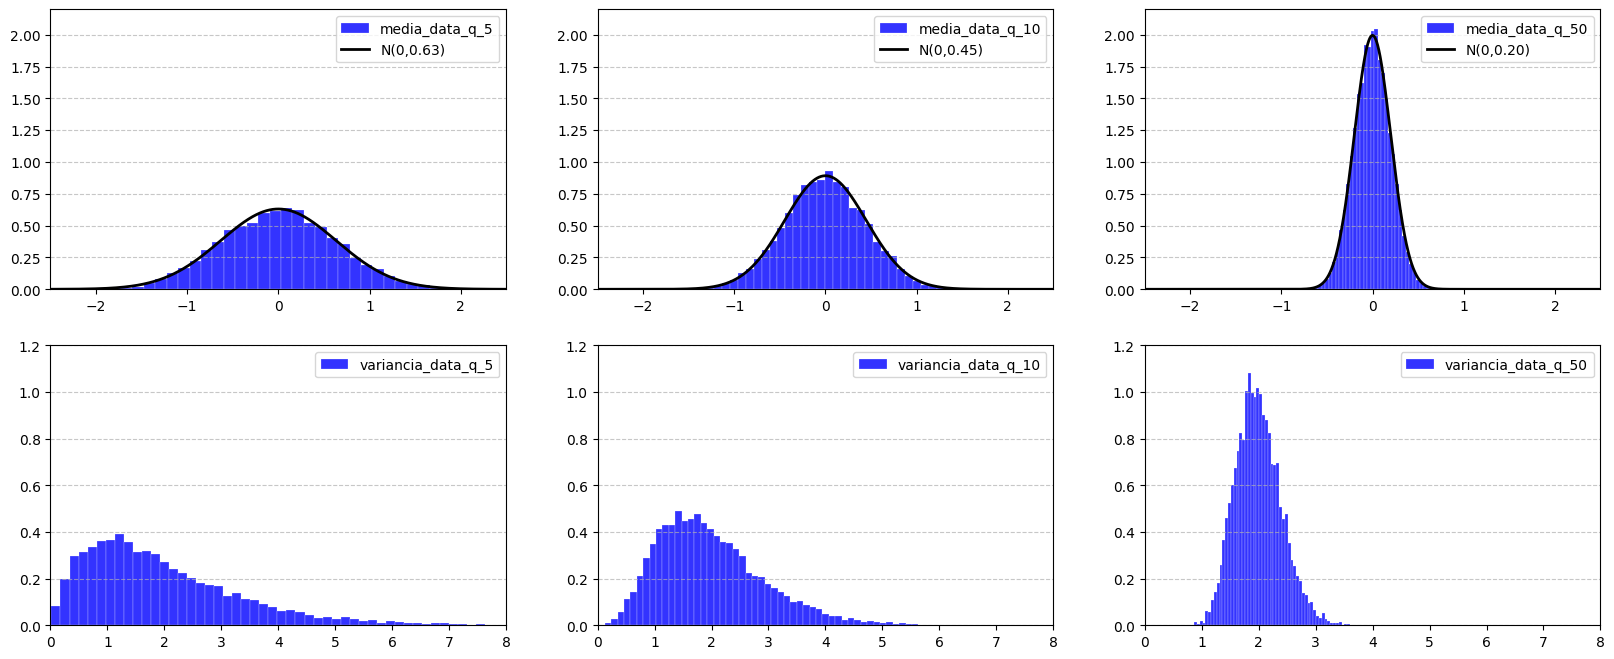

In [9]:
desv = [np.sqrt(2)/np.sqrt(5), np.sqrt(2)/np.sqrt(10), np.sqrt(2)/np.sqrt(50)]

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, (key, med) in enumerate(medias_amostrais_q.items()):
    x_axis = np.arange(-10, 10, 0.001)
    axs[0,i].hist(med, density=True, bins=40, edgecolor="white", alpha=0.8, label=f'media_{key}', linewidth=0.2, color="blue")
    axs[0,i].plot(x_axis, norm.pdf(x_axis, 0, desv[i]), 'k-', lw=2, label=f'N(0,{desv[i]:.2f})')
    axs[0,i].set_xlim((-2.5,2.5))
    axs[0,i].set_ylim((0,2.2))
    axs[0,i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[0,i].legend()

for j, (key, var) in enumerate(variancias_amostrais_q.items()):
    #x_axis = np.arange(-10, 10, 0.001)
    axs[1,j].hist(var, density=True, bins='auto', edgecolor="white", alpha=0.8, label=f'variancia_{key}', linewidth=0.2, color="blue")
    #axs[i].plot(x_axis, norm.pdf(x_axis, 0, desv[i]), 'k-', lw=2, label=f'N(0,{desv[i]:.2f})')
    axs[1,j].set_xlim((0,8))
    axs[1,j].set_ylim((0,1.2))
    axs[1,j].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1,j].legend()

plt.show()

data_x:

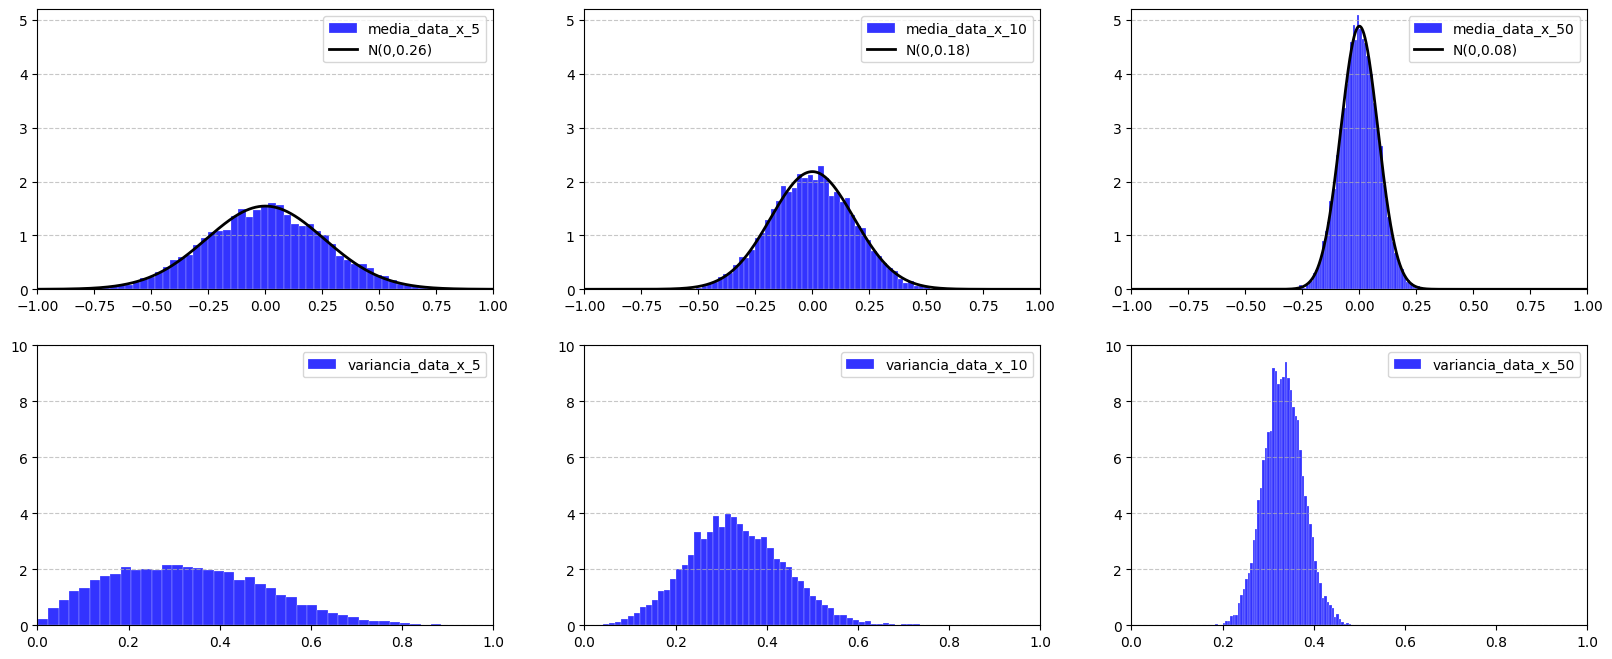

In [10]:
desv = [np.sqrt(1/3)/np.sqrt(5), np.sqrt(1/3)/np.sqrt(10), np.sqrt(1/3)/np.sqrt(50)]

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, (key, med) in enumerate(medias_amostrais_x.items()):
    x_axis = np.arange(-10, 10, 0.001)
    axs[0,i].hist(med, density=True, bins='auto', edgecolor="white", alpha=0.8, label=f'media_{key}', linewidth=0.2, color="blue")
    axs[0,i].plot(x_axis, norm.pdf(x_axis, 0, desv[i]), 'k-', lw=2, label=f'N(0,{desv[i]:.2f})')
    axs[0,i].set_xlim((-1,1))
    axs[0,i].set_ylim((0,5.2))
    axs[0,i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[0,i].legend()


for j, (key, var) in enumerate(variancias_amostrais_x.items()):
    #x_axis = np.arange(-10, 10, 0.001)
    axs[1,j].hist(var, density=True, bins='auto', edgecolor="white", alpha=0.8, label=f'variancia_{key}', linewidth=0.2, color="blue")
    #axs[i].plot(x_axis, norm.pdf(x_axis, 0, desv[i]), 'k-', lw=2, label=f'N(0,{desv[i]:.2f})')
    axs[1,j].set_xlim((0,1))
    axs[1,j].set_ylim((0,10))
    axs[1,j].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1,j].legend()

plt.show()

data_y:

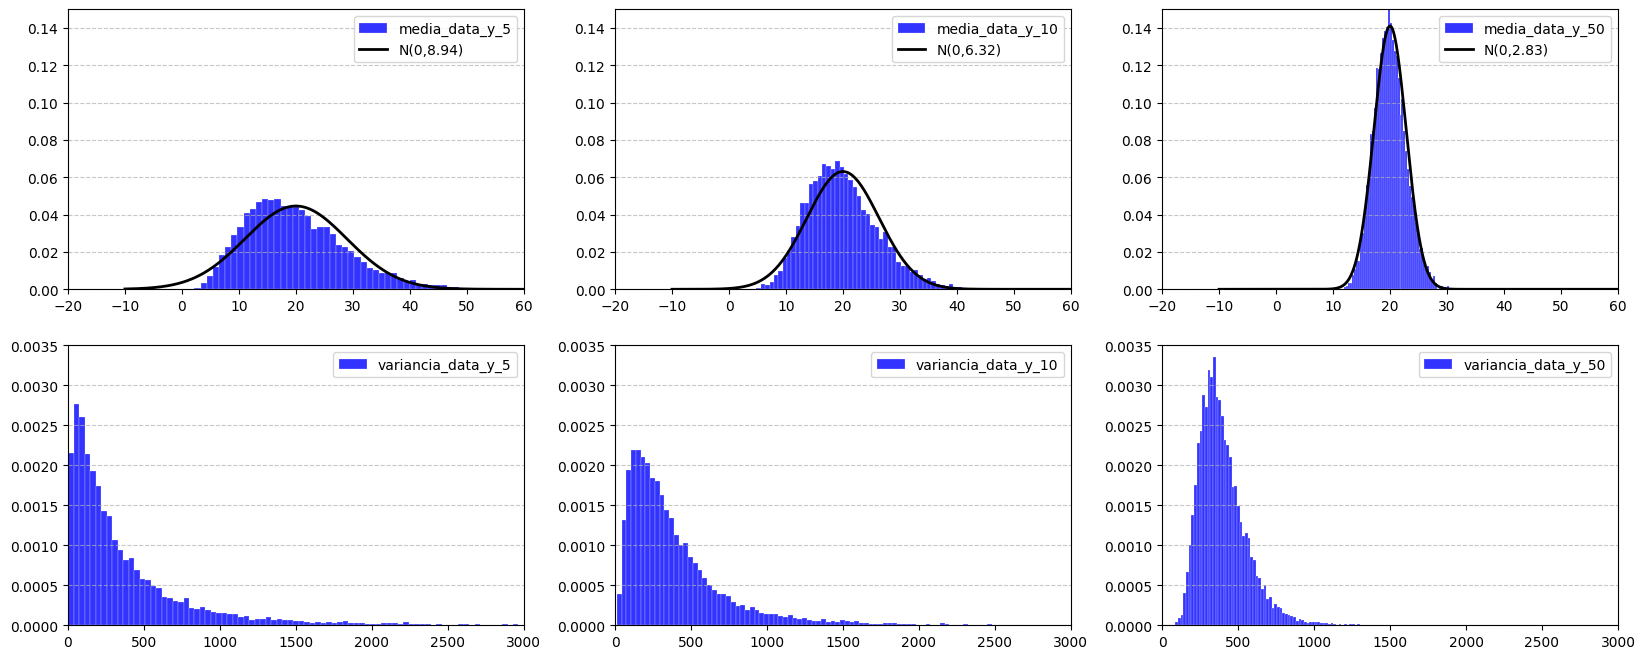

In [11]:
desv = [np.sqrt(400)/np.sqrt(5), np.sqrt(400)/np.sqrt(10), np.sqrt(400)/np.sqrt(50)]

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i,(key, med) in enumerate(medias_amostrais_y.items()):
    x_axis = np.arange(-10, 80, 0.001)
    axs[0,i].hist(med, density=True, bins='auto', edgecolor="white", alpha=0.8, label=f'media_{key}', linewidth=0.2, color="blue")
    axs[0,i].plot(x_axis, norm.pdf(x_axis, 20, desv[i]), 'k-', lw=2, label=f'N(0,{desv[i]:.2f})')
    axs[0,i].set_xlim((-20,60))
    axs[0,i].set_ylim((0,0.15))
    axs[0,i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[0,i].legend()

for j, (key, var) in enumerate(variancias_amostrais_y.items()):
    #x_axis = np.arange(-10, 10, 0.001)
    axs[1,j].hist(var, density=True, bins='auto', edgecolor="white", alpha=0.8, label=f'variancia_{key}', linewidth=0.2, color="blue")
    #axs[i].plot(x_axis, norm.pdf(x_axis, 0, desv[i]), 'k-', lw=2, label=f'N(0,{desv[i]:.2f})')
    axs[1,j].set_xlim((0,3000))
    axs[1,j].set_ylim((0,0.0035))
    axs[1,j].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1,j].legend()

plt.show()

data_t:

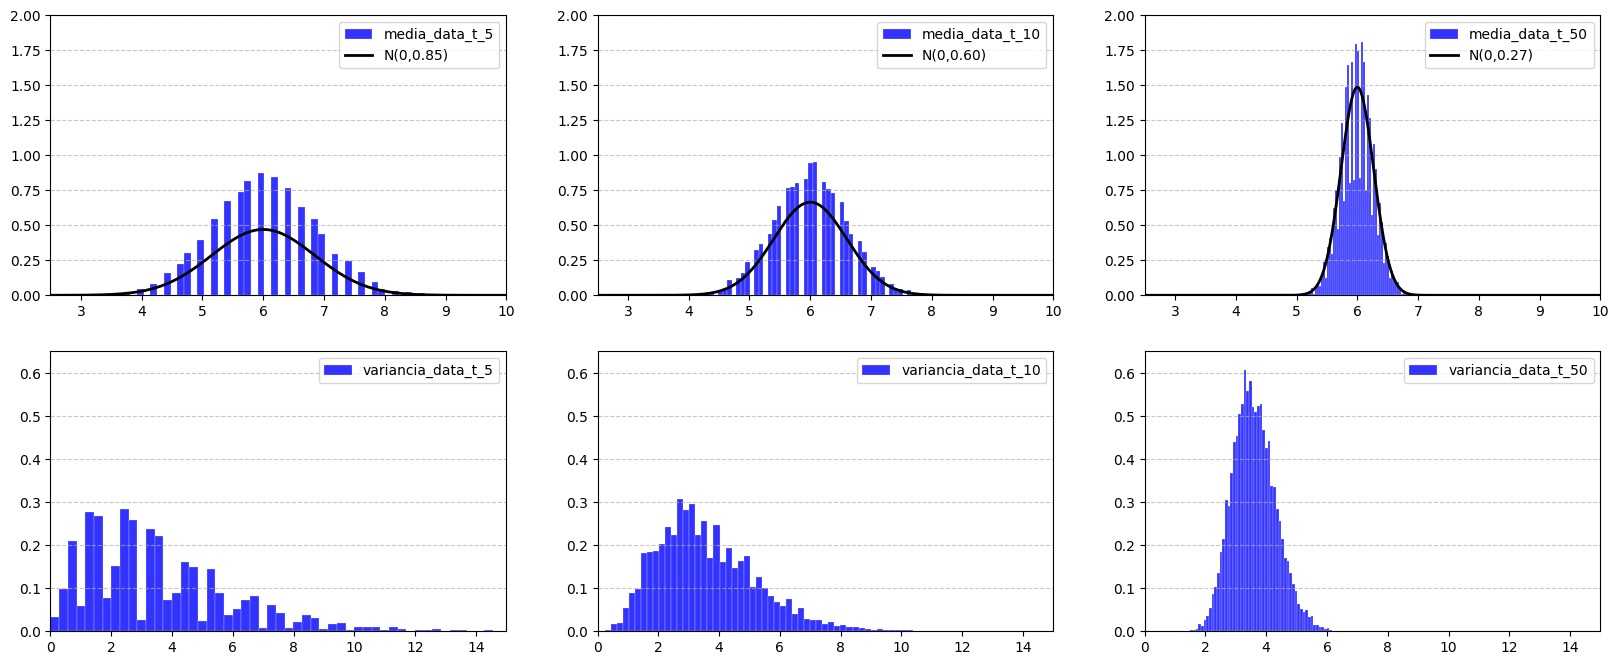

In [12]:
desv = [np.sqrt(3.6)/np.sqrt(5), np.sqrt(3.6)/np.sqrt(10), np.sqrt(3.6)/np.sqrt(50)]

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, (key, med) in enumerate(medias_amostrais_t.items()):
    x_axis = np.arange(-10, 10, 0.001)
    axs[0,i].hist(med, density=True, bins='auto', edgecolor="white", alpha=0.8, label=f'media_{key}', linewidth=0.2, color="blue")
    axs[0,i].plot(x_axis, norm.pdf(x_axis, 6, desv[i]), 'k-', lw=2, label=f'N(0,{desv[i]:.2f})')
    axs[0,i].set_xlim((2.5,10))
    axs[0,i].set_ylim((0,2))
    axs[0,i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[0,i].legend()

for j, (key, var) in enumerate(variancias_amostrais_t.items()):
    #x_axis = np.arange(-10, 10, 0.001)
    axs[1,j].hist(var, density=True, bins='auto', edgecolor="white", alpha=0.8, label=f'variancia_{key}', linewidth=0.2, color="blue")
    #axs[i].plot(x_axis, norm.pdf(x_axis, 0, desv[i]), 'k-', lw=2, label=f'N(0,{desv[i]:.2f})')
    axs[1,j].set_xlim((0,15))
    axs[1,j].set_ylim((0,0.65))
    axs[1,j].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1,j].legend()

plt.show()

Falta corrigir problema da bionimial, colocar curva respectiva na variancia amostral e legendar eixos